In [1]:
#importing relevant modules
import matplotlib.pyplot as plt
from collections import Counter
import re
import math
import urllib.request
import numpy as np
import string

In [2]:
#Getting the url for the review data
url1 = "https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt"
urllib.request.urlretrieve(url1, "Compiled_Reviews.txt")

#creating lists for the review data to go into
reviews=[]
sentiment_ratings=[]
product_types=[]
helpfulness_ratings=[]

#splitting the data into relevant lists
with open("Compiled_Reviews.txt", encoding="utf-8") as f:
   for line in f.readlines()[1:]:
        fields = line.rstrip().split('\t')
        reviews.append(fields[0])
        sentiment_ratings.append(fields[1])
        product_types.append(fields[2])
        helpfulness_ratings.append(fields[3])

#making all the reviews lower case
reviews = [review.lower() for review in reviews]

Text(0.5, 1.0, 'Number of Reviews by Sentiment Rating')

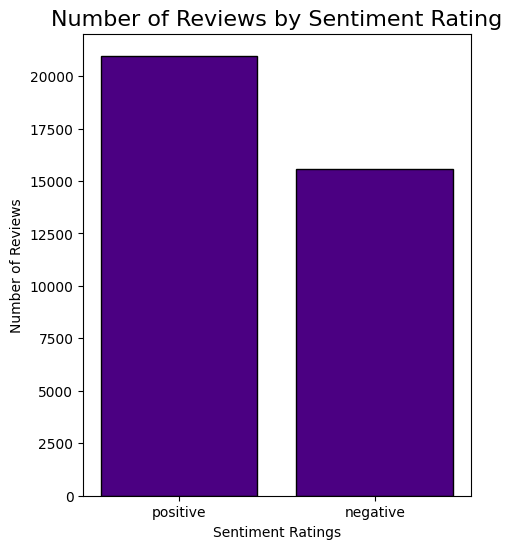

In [3]:
#Plotting the number of reviews by the sentiment ratings in the reviews

#counting the sentiment ratings
sentiment_counts = Counter(sentiment_ratings)
sentiments = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())

#plotting the bar chart
plt.figure(figsize=(5, 6))
plt.bar(sentiments, counts, color='indigo', edgecolor='black')
plt.xlabel('Sentiment Ratings')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Sentiment Rating', fontsize=16)

In [4]:
#downloading a list of stopwords from github
url2 =  "https://raw.githubusercontent.com/Alir3z4/stop-words/master/english.txt"
file_path = "english.txt"
urllib.request.urlretrieve(url2, file_path)


with open(file_path, "r", encoding="utf-8") as file:
    stop_words = file.read().splitlines()

#making the stop words lower case
stop_words = [word.lower() for word in stop_words]

In [5]:
#creating a set of all punctuation
punctuation = set(string.punctuation)

#tokenising the reviews and filerting out stop words and punctuation
tokenised_sentences = [
    [word for word in re.findall("[^ ]+", text) if word not in stop_words and word not in punctuation]
    for text in reviews]

#Creating a token list from the tokenised sentences
tokens=[]
for s in tokenised_sentences:
  tokens.extend(s)

#counting tokens
counts = Counter(tokens)

#sorts tokens with their frequencies and puts them in a descending order
so=sorted(counts.items(), key=lambda item: item[1], reverse=True)

#creates a list of only the tokens
so=list(zip(*so))[0]

#creates a vocabulary of the 5000 most frequent words
type_list=so[0:5000]

In [6]:
#Encoding the words

#creates matrix of reviews the size of the reviews by the vocab 
M = np.zeros((len(reviews), len(type_list)))

#iterates through the reviews and checks if the word appears in appears in the vocab. then indicates it with a 1 if its there.
for i, rev in enumerate(reviews):
  tokens = re.findall("[^ ]+",rev)
  for j,t in enumerate(type_list):
    if t in tokens:
      M[i,j] = 1

In [7]:
#Splitting the data into sets

#randomly seperating data into training, testing and development sets
train = np.random.choice(len(reviews), int(len(reviews)*0.8), replace=False)
remaining = list(set(range(len(reviews))) - set(train))
test = np.random.choice(remaining, int(len(remaining) * 0.5), replace=False)
dev = list(set(remaining) - set(test))

#creating matrices of the testing, training and development sets
M_train = np.array(M[train,].T)
M_test = np.array(M[test,].T)
M_dev = np.array(M[dev,]).T

#creating sentiment labels for the three sets
SR_train = [sentiment_ratings[i] for i in train]
SR_test = [sentiment_ratings[i] for i in test]
SR_dev = [sentiment_ratings[i] for i in dev]

In [8]:
print(SR_dev)

['positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'po

Iteration 0: Train Loss = 4.5832, Dev Loss = 0.7593
Positive tokens: ['dad', '2006,', 'xp', 'complaining', 'files', 'adjusted', 'bob', 'disappointed', 'yoga', 'blew', 'honestly', 'conclusion', 'asian', 'happened.', 'spoke', 'uninstall', 'grab', 'option', 'child', 'lounge']
Negative tokens: ['impact', 'plant', 'soft,', '100%', 'rose', 'this.', 'improve', 'add', 'stayed', 'short', 'mid', 'identify', 'newborn', 'season', 'tank', 'itself,', 'wide', 'city', 'ever.', 'unit,']
Iteration 100: Train Loss = 2.9054, Dev Loss = 4.2470
Positive tokens: ['together,', 'velcro', 'rights', 'sugar', 'dropped', 'advise', 'box.', 'point.', 'ground.', 'civil', 'website,', 'favorites', 'designs', '"works', 'tradition', 'husband.', 'notebooks', 'piano', 'shots', 'basket']
Negative tokens: ['testing', 'printing', 'bedroom', 'rest', 'min', 'great,', 'stomach', '"i', 'china', 'extend', 'packaging', 'international', 'artificial', 'escape', 'stays', 'power.', 'tend', 'feed', 'worse', 'receiver']
Iteration 200: Tr

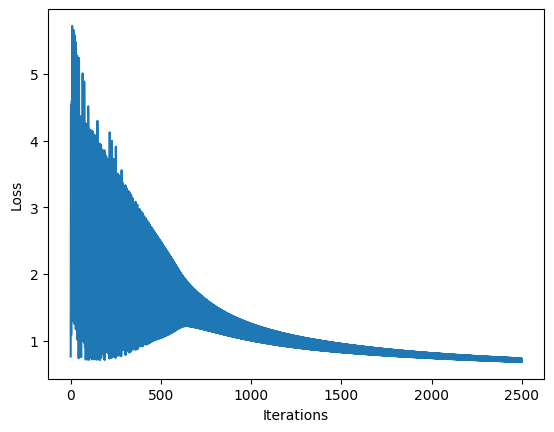

In [9]:
#multilayer neural network

#the input to the model is equal to the vocab size
num_features=5000
#number of iterations and the learning rate
n_iters = 2500
lr = 0.1
#encodes the sentiment labels. 1 for pos and 0 for neg
y=[1 if label == "positive" else 0 for label in SR_train]
#sets the total number of labels
num_samples = len(y)
#creates an empty list for the loss
logistic_loss = []

#setting the number of nodes in the hidden layer
hidden_layer = 6

#initialising the layers of weights
weights_0_1 = np.random.rand(num_features, hidden_layer)
weights_1_2 = np.random.rand(hidden_layer, 1) 

#initilaisng the bias values
bias_0_1 = np.zeros((1, hidden_layer))
bias_1_2 = np.zeros((1, 1))


for i in range(n_iters):

  #forward pass
  #hidden layer
  z_1 = np.dot(M_train.T, weights_0_1) + bias_0_1
  #ReLU activation
  hidden_relu = np.maximum(0, z_1)
  
  #output layer
  z_2 = np.dot(hidden_relu, weights_1_2) + bias_1_2
  #sigmoid activation
  q = 1/(1 + np.exp(-z_2))

  #loss
  #small constant to prevent division by zero
  eps = 0.00001
  #shape of the true labels
  y = np.array(y).flatten()
  #shape of the predicted probabilites
  q = q.flatten()
  #calculating loss
  loss = -np.mean(y * np.log(q + eps) + (1 - y) * np.log(1 - q + eps))
  logistic_loss.append(loss)

  #backwards pass
  #error of the output layer
  error_output = (q - y).reshape(-1, 1)
  #error of the hidden layer
  error_hidden = np.dot(error_output, weights_1_2.T) * (z_1 > 0)
  
  #calculating gradients for the second layer weights and biases
  dw_1_2 = np.dot(hidden_relu.T, error_output) / num_samples
  db_1_2 = np.mean(error_output)
  
  #calulating gradients for the first layer weights and biases
  dw_0_1 = np.dot(M_train, error_hidden) / num_samples
  db_0_1 = np.mean(error_hidden)

  #updating weights and biases

  weights_1_2 -= lr * dw_1_2
  bias_1_2 -= lr * db_1_2

  weights_0_1 -= lr * dw_0_1
  bias_0_1 -= lr * db_0_1

  #converting the predicted probabilities to binary
  y_pred = [int(ql > 0.5) for ql in q]

  #every 100 iterations, using the current weights and biases calculating the loss of the training set and the dev set.
  if i % 100 == 0:
        #first layer
        z_1_dev = np.dot(M_dev.T, weights_0_1) + bias_0_1
        #ReLU 
        hidden_dev = np.maximum(0, z_1_dev)
        #output layer
        z_2_dev = np.dot(hidden_dev, weights_1_2) + bias_1_2
        #sigmoid to get probabilities
        q_dev = 1 / (1 + np.exp(-z_2_dev))
        #true labels to binary
        y_dev = np.array([1 if label == "positive" else 0 for label in SR_dev])
        q_dev = q_dev.flatten()
        #development loss
        dev_loss = -np.mean(y_dev * np.log(q_dev + eps) + (1 - y_dev) * np.log(1 - q_dev + eps))
        dev_loss_list= []
        dev_loss_list.append(dev_loss)
        print(f"Iteration {i}: Train Loss = {loss:.4f}, Dev Loss = {dev_loss:.4f}")

  #every 100 iterations, print the most heavily weighted positive and negative tokens
  if i % 100 == 0:
      alltokens= np.dot(weights_0_1, weights_1_2).flatten()
      postokens = [type_list[x] for x in np.argsort(alltokens)[::-1][:20]]
      negtokens = [type_list[x] for x in np.argsort(alltokens)[:20]]
      print(f"Positive tokens: {postokens}")
      print(f"Negative tokens: {negtokens}")


#plot loss gradient
plt.plot(range(1,n_iters), logistic_loss[1:])
plt.xlabel("Iterations")
plt.ylabel("Loss")

#get exact value for loss
print(f'Final loss {loss}')

In [10]:
#testing true values against predictions

#output of the hidden layer with the test set
layer_1 = np.maximum(M_test.T.dot(weights_0_1) + bias_0_1, 0) 
#output of the output layer with the test set
layer_2 = layer_1.dot(weights_1_2) + bias_1_2
#sigmoid activation
q = 1/(1+np.exp(-layer_2))

#convert predictions to binary
y_test_pred = [int(prob > 0.5) for prob in q]
print(y_test_pred)
#create true value labels
y_test=[int(l == "positive") for l in SR_test]
print(y_test)

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 

C:\Users\rowan\AppData\Local\Temp\ipykernel_20940\3235786505.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test_pred = [int(prob > 0.5) for prob in q]


In [11]:
#Testing accuracy, precision, recall 

#list of correct predictions
acc_test=[int(yp == y_test[s]) for s,yp in enumerate(y_test_pred)]
#calculating accuracy
print(f'accuracy: {sum(acc_test)/len(acc_test)}')


labels_test_pred=["positive" if s == 1 else "negative" for s in y_test_pred]

#calculating true pos, true neg, false pos, false neg. 
true_positives=sum([int(yp == "positive" and SR_test[s] == "positive") for s,yp in enumerate(labels_test_pred)])
true_negatives=sum([int(yp == "negative" and SR_test[s] == "negative") for s,yp in enumerate(labels_test_pred)])
false_positives=sum([int(yp == "positive" and SR_test[s] == "negative") for s,yp in enumerate(labels_test_pred)])
false_negatives=sum([int(yp == "negative" and SR_test[s] == "positive") for s,yp in enumerate(labels_test_pred)])


#calculating precision and recall
precision = true_positives/(true_positives + false_positives)
recall = true_positives/(true_positives + false_negatives)
print(f'precision: {precision}')
print(f'recall: {recall}')

accuracy: 0.7004103967168263
precision: 0.6615067079463365
recall: 0.9454277286135693


In [12]:
#Identifying positive and negatively weighted tokens

#combining all weights
all_weights = np.dot(weights_0_1, weights_1_2).flatten()

#sorting them by highest weighted
postokens = [type_list[x] for x in np.argsort(all_weights)[::-1][:20]]
negtokens = [type_list[x] for x in np.argsort(all_weights)[:20]]

print(f"Positive tokens: {postokens}")
print(f"Negative tokens: {negtokens}")


Positive tokens: ['easy', 'highly', 'love', 'perfect', 'excellent', 'helps', 'great!', 'fits', 'included', 'it!', 'pleased', 'happy', '2004', 'land', 'favorite', 'easily', 'capability', 'disposable', 'ds', 'options']
Negative tokens: ['waste', 'worst', 'poor', 'return', 'money', 'disappointed', 'bad', 'returned', 'worse', 'unfortunately,', 'boring', 'support', 'guess', 'disappointed.', 'completely', 'author', 'work.', 'send', 'company', 'china']
